In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# Load data from CSV file using pandas
file_path1 = './data/scope_3.csv'  # Replace with the actual path to your CSV file
file_path2 = './data/scope_5.csv'  # Replace with the actual path to your CSV file
data1 = pd.read_csv(file_path1, skiprows=1, skipfooter=1)
data2 = pd.read_csv(file_path2, skiprows=1, skipfooter=1)
# Assuming your CSV has columns named 'time' and 'voltage'
x1 = data1['second'] * 10e7
y1 = data1['Volt'] * 0.2

x2 = data2['second'] * 10e7
y2 = data2['Volt']

print(len(y2))

print(np.min(np.abs(y2)))
print(np.max(np.abs(y2)))

min = np.min(np.abs(y2))
max = np.max(np.abs(y2))

diff = np.empty(len(y2))

for i, val in enumerate(y2):
    if (i+1 == len(y2)):
        diff[i] = 0.1
    else :
        diff[i] = y2[i+1] - y2[i]
    
diff_1 = [x for x in diff if x != 0.0]

print(np.min(np.abs(diff_1)))

print(max/1e-14)

print(2**12)

999
7.53710046e-05
0.4079648256302
9.999640004920707e-14
40796482563020.0
4096


C:\Users\schsd\AppData\Local\Temp\ipykernel_46592\3743200419.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data1 = pd.read_csv(file_path1, skiprows=1, skipfooter=1)
C:\Users\schsd\AppData\Local\Temp\ipykernel_46592\3743200419.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data2 = pd.read_csv(file_path2, skiprows=1, skipfooter=1)


## Normalize the Values to Binary Values

In [3]:
res = 4095

v_max = 1.0 

# conv_data = np.empty(len(y2), dtype = np.int16)
conv_data = []
for i, val in enumerate(y2):
    #conv_data[i] = int(val*4095)
    conv_data.append(int(val*4095))

#revert_bin_data = conv_data/4095
conv_data = conv_data[:992]
bin_data = np.array([np.binary_repr(data, width=16) for data in conv_data])

print(len(conv_data))
with open('nanowire1.txt', 'w') as bin_file:
     for i, bin_str in enumerate(bin_data):
          bin_file.write(bin_str)
          if (i != (len(bin_data)-1)):
            bin_file.write('\n')


992


In [4]:
# Find the sample past threshold
threshold = 1024

for i, val in enumerate(conv_data):
    if ((val - threshold) > 0):
        thresh_ind = i
        break
print((thresh_ind+8) )



214


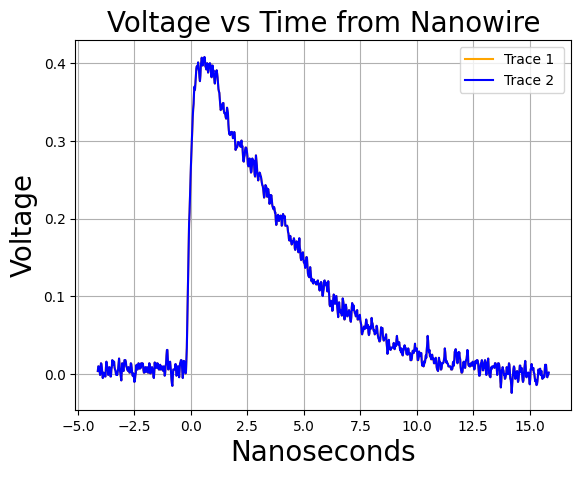

In [35]:
# Create the plot
plt.plot(x2, revert_bin_data, label='Trace 1 ', color='orange')
plt.plot(x2, y2, label='Trace 2', color='blue')

# Add labels and title
plt.xlabel('Nanoseconds', fontsize=2 * plt.rcParams['font.size'])  # 50% larger than default
plt.ylabel('Voltage', fontsize=2* plt.rcParams['font.size'])  # 50% larger than default
plt.title('Voltage vs Time from Nanowire', fontsize=2 * plt.rcParams['font.size'])  # 50% larger than default

plt.grid(True)

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Double Peak Data Set

[ 998  999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011
 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025
 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039
 1040 1041 1042 1043 1044 1045  998  999 1000 1001 1002 1003 1004 1005
 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019
 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033
 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045]


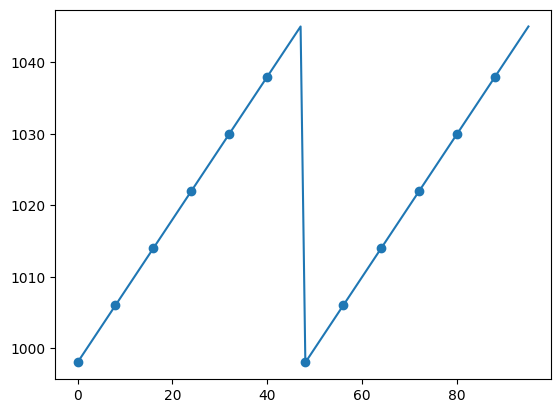

In [10]:
# Have two peaks succintly occur back to back
double_peak = [i+998 for i in range(48)]
double_peak = np.array(double_peak,dtype=np.int16)
double_peak = np.concatenate((double_peak, double_peak), axis=0)

print(double_peak)

plt.plot(double_peak, marker = 'o', markevery=8)

d_bin_data = np.array([np.binary_repr(data, width=16) for data in double_peak])

with open('doublepeak1.txt', 'w') as d_bin_file:
     for i, bin_str in enumerate(d_bin_data):
          d_bin_file.write(bin_str)
          if (i != (len(d_bin_data)-1)):
                d_bin_file.write('\n')